# Assignment: Analyzing Airline Flight Delays
For a full treatment of the unit 14 case study, please review module 14.3. Some points from the video are given below.

 - Work with the airline data set (use R or Python to manage out-of-core).
 - Answer the following questions by using the split-apply-combine technique:
   - Which airports are most likely to be delayed flying out of or into?
   - Which flights with same origin and destination are most likely to be delayed?
   - Can you regress how delayed a flight will be before it is delayed?
     - What are the most important features for this regression?
     - Remember to properly cross-validate models.
     - Use meaningful evaluation criteria.
     - Create at least one new feature variable for the regression.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("final_project.csv")

In [3]:
df.sample(n=10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
54044,-0.110819,12.274583,-5.730040,-3.275435,5.910853,-9.277077,-8.331047,-9.262895,-3.498106,0.873119,...,-6.199415,-3.797911,1.254094,10.270385,0.384905,-15.151881,1.578971,-2.106948,9.347478,0
48890,-0.535196,-3.357592,3.042146,-14.186295,1.862506,2.932431,4.423052,0.892407,-2.746541,9.560044,...,15.968288,-5.054370,0.184566,-1.155190,-0.613257,-41.440843,-3.455155,0.800843,-0.967170,0
55614,-0.333559,7.632800,-1.814498,-1.158836,-1.929750,7.015523,-2.638143,-53.109321,-1.118993,-15.102969,...,29.728564,-6.237468,-1.000547,-0.187427,-0.249585,15.864010,3.943915,1.700342,10.700237,1
16916,-0.197760,5.943099,3.515062,-4.380963,7.118805,3.041251,5.110636,30.674682,-0.994104,5.443625,...,-13.745152,5.028251,-1.881834,-3.394177,0.378586,1.046886,6.222091,-0.372056,6.344860,0
107905,0.326787,2.943619,1.434467,12.473565,9.807095,-0.156277,2.085607,-54.221618,7.940231,1.395622,...,41.161047,-8.777432,-0.515979,0.043310,0.253025,-17.614834,3.323544,-0.053079,6.694571,1
135482,0.006600,2.817144,-13.241835,1.783250,-1.714820,-9.193557,-19.252633,1.132971,-3.884647,-4.971357,...,0.451816,-4.621407,-1.375368,-0.382625,-0.220844,17.354597,-0.019720,-0.091231,20.863345,1
21603,-0.002989,4.203030,17.436922,-4.232834,-0.002549,-1.730377,25.351975,-28.725727,13.346000,-9.415946,...,20.276765,-2.240751,0.246079,4.542831,-0.817174,-11.415606,-2.124574,1.463043,-6.070872,0
69685,-0.325995,-0.655000,-21.506347,14.552810,2.100748,0.747430,-31.268613,53.971114,0.494702,-0.286339,...,-38.871819,-4.938071,-0.067123,-3.450656,0.413614,-74.790946,0.293547,-1.055502,-5.607060,1
46219,-0.453419,6.639394,9.231856,-0.806241,9.581290,0.752045,13.422425,-28.475679,-3.460630,-7.068977,...,13.472253,-1.917690,1.602169,2.990443,0.416747,-31.238205,3.463619,-2.769074,-8.799173,0
107176,-1.131724,0.883621,14.077402,-3.942143,-4.564758,4.114357,20.467485,-39.934599,4.412708,1.448608,...,27.220669,-0.382630,2.027698,-0.400421,-0.360707,4.908265,3.860855,-0.286987,1.393875,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

The data has 160,000 entries and 50 variables plus one target variable. The majority of variables are floats, however, 5 of those are objects (so most likely categorical values) and the target variable is an integer (as the values are simply 0 and 1).

Table 1 below shows various summary statistics about the 50 variables. We can immediately see from the counts of each variable that each one has missing values, with the exception of the target y.

In [5]:
print("Table 1: Dataset values")
df.describe().T

Table 1: Dataset values


,count,mean,std,min,25%,50%,75%,max
x0,159974.0,-0.001028,0.371137,-1.592635,-0.251641,-0.002047,0.248532,1.600849
x1,159975.0,0.001358,6.340632,-26.278302,-4.260973,0.004813,4.284220,27.988178
x2,159962.0,-1.150145,13.273480,-59.394048,-10.166536,-1.340932,7.871676,63.545653
x3,159963.0,-0.024637,8.065032,-35.476594,-5.454438,-0.031408,5.445179,38.906025
x4,159974.0,-0.000549,6.382293,-28.467536,-4.313118,0.000857,4.306660,26.247812
x5,159963.0,0.013582,7.670076,-33.822988,-5.148130,0.014118,5.190749,35.550110
x6,159974.0,-1.670670,19.298665,-86.354483,-14.780146,-1.948594,11.446931,92.390605
x7,159973.0,-7.692795,30.542264,-181.506976,-27.324771,-6.956789,12.217071,149.150634
x8,159979.0,-0.030540,8.901185,-37.691045,-6.031058,-0.016840,5.972349,39.049831
x9,159970.0,0.005462,6.355040,-27.980659,-4.260619,0.006045,4.305734,27.377842


Table 2 shows summaries of the variables when only rows including missing values are included in the dataset.

The total number of rows in which at least one value is missing is 1608, shown by the count of the target variable y in Table 2.

In [6]:
incomplete_rows = df[df.isnull().T.any().T]
print("Table 2: Rows with values missing")
incomplete_rows.describe().T

Table 2: Rows with values missing


,count,mean,std,min,25%,50%,75%,max
x0,1582.0,-0.023089,0.377887,-1.212433,-0.285652,-0.025781,0.240336,1.062456
x1,1583.0,-0.233420,6.371781,-20.786128,-4.369415,-0.485559,3.983232,20.880954
x2,1570.0,-1.334860,13.148857,-46.839020,-10.143075,-1.277619,6.859011,49.259277
x3,1571.0,-0.188496,7.903637,-35.476594,-5.602259,-0.194008,5.098055,23.203595
x4,1582.0,-0.028848,6.281941,-19.843832,-4.257341,0.231269,4.124178,23.226720
x5,1571.0,0.043772,7.465302,-22.177503,-4.962307,-0.089206,5.052989,26.222837
x6,1582.0,-1.781634,19.122589,-68.100416,-14.582127,-1.705497,10.072974,71.619288
x7,1581.0,-7.183631,30.617878,-114.772305,-27.591361,-6.450030,12.546484,91.092993
x8,1587.0,-0.198952,8.611786,-28.924057,-5.802014,-0.112694,5.507070,28.870563
x9,1578.0,0.120118,6.423960,-20.818082,-4.272139,0.308101,4.530010,20.682787


In [7]:
print("Table 3: Categorical values")
df[df.columns[df.dtypes == "O"]].describe()

Table 3: Categorical values


,x24,x29,x30,x32,x37
count,159972,159970,159970,159969,159977
unique,3,12,5,12,129198
top,asia,July,wednesday,0.01%,$-415.46
freq,138965,45569,101535,40767,6


Closer inspection of the categorical values in Table 3 allows us to make some changes. x32 is a percentage and x37 is a dollar value, so removing the symbols % and $ will enable us to convert the values to floats to match the resst of the numerical values in the dataset.

In [8]:
df.x32 = df.x32.str.replace('%','').astype(np.float64)
df.x37 = df.x37.str.replace('$','').astype(np.float64)

In [9]:
df[df.columns[df.dtypes=="O"]].describe()

,x24,x29,x30
count,159972,159970,159970
unique,3,12,5
top,asia,July,wednesday
freq,138965,45569,101535


The numerical values have normal distributions as seen in Figures 1 through 47 below. In some cases the data is separated by the label assigned to the target variable y, but there are also cases where no difference is seen.

/Users/kjprice/anaconda3/envs/python3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


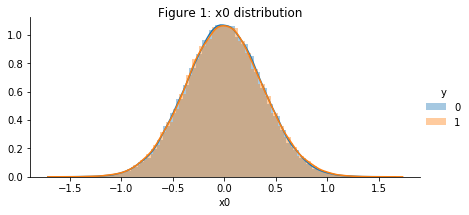

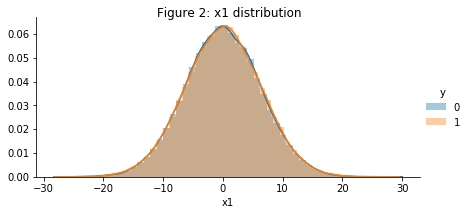

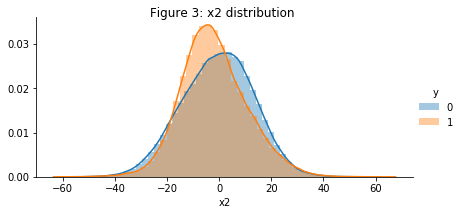

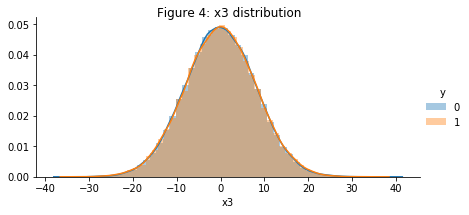

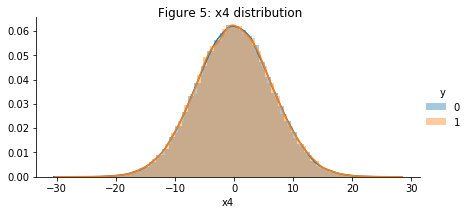

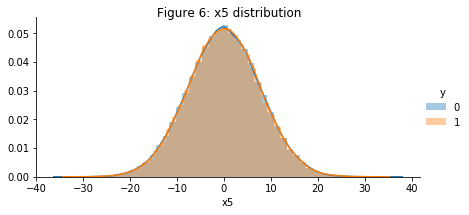

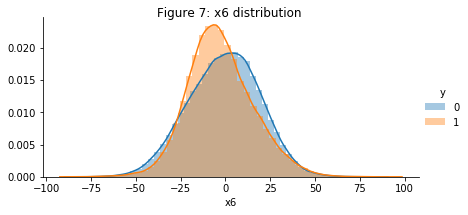

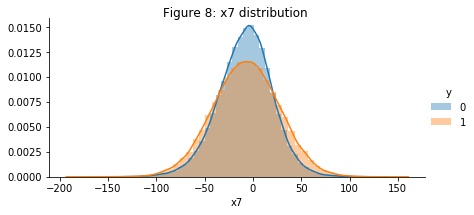

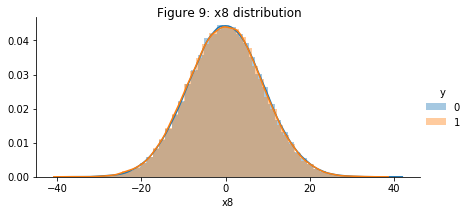

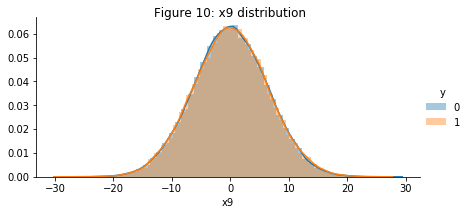

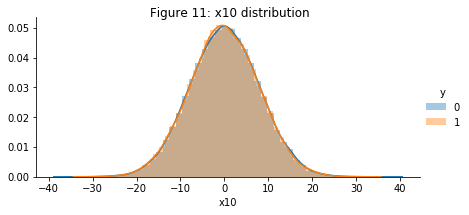

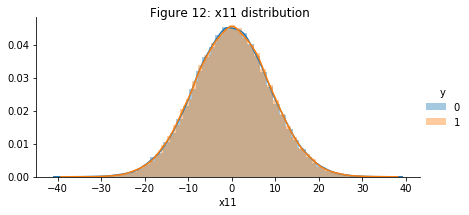

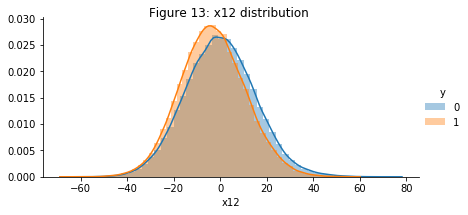

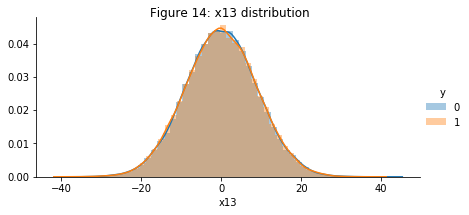

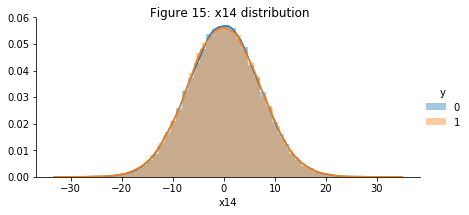

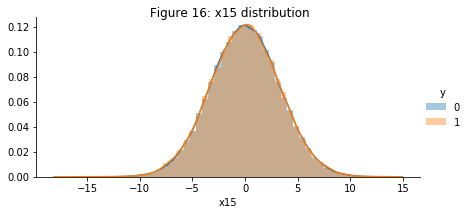

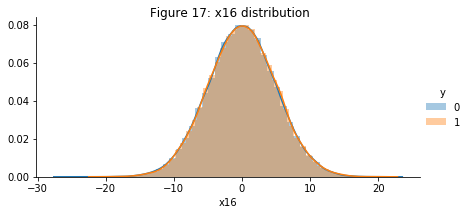

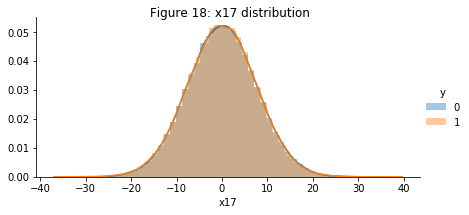

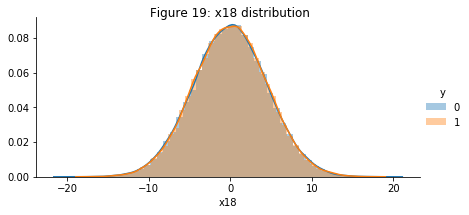

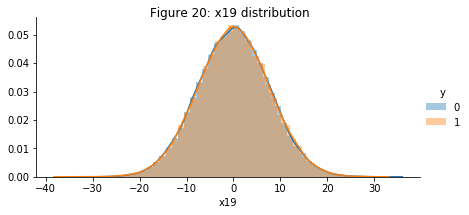

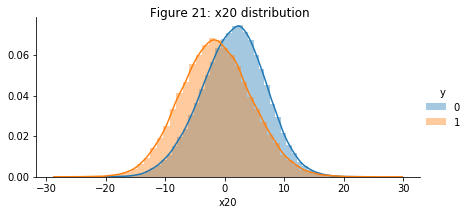

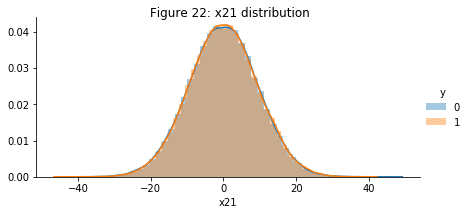

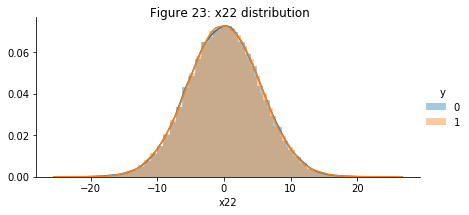

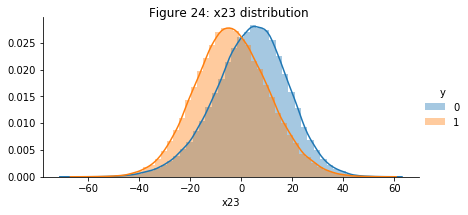

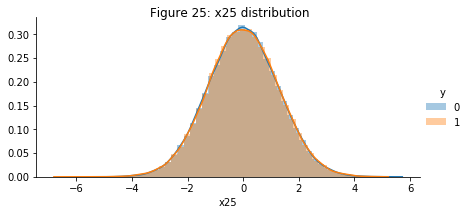

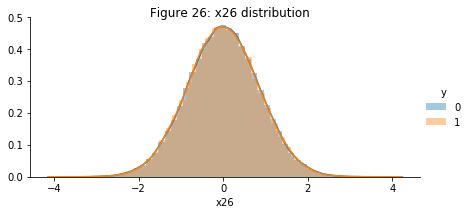

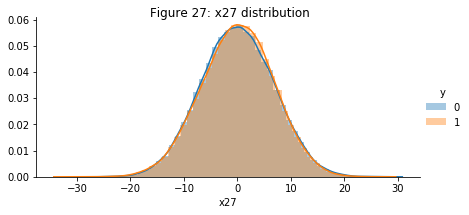

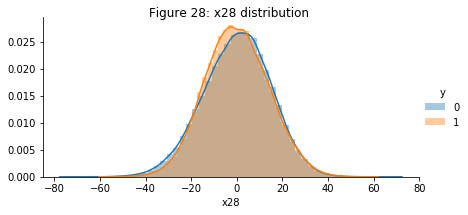

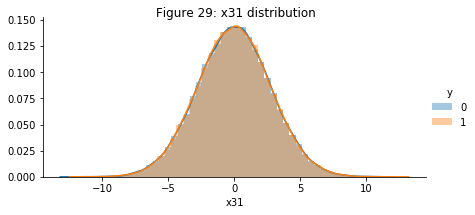

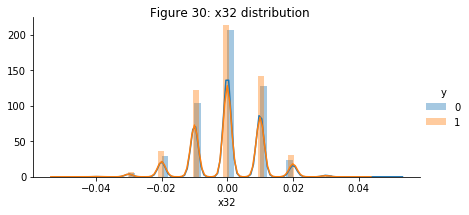

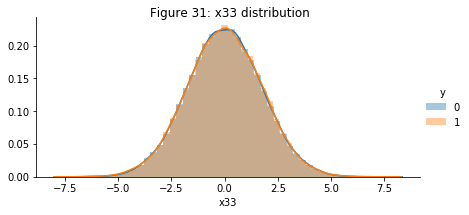

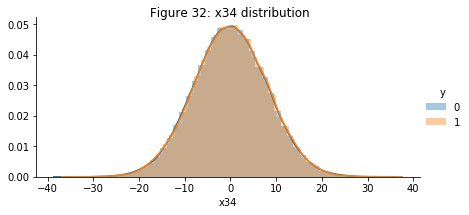

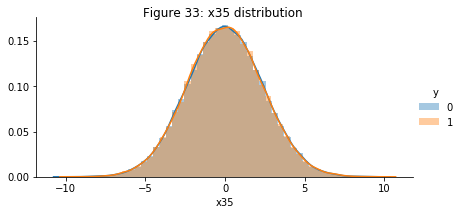

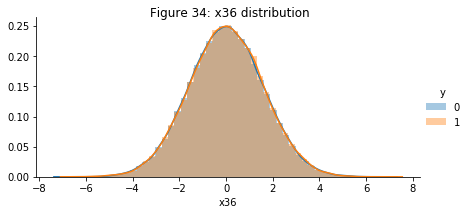

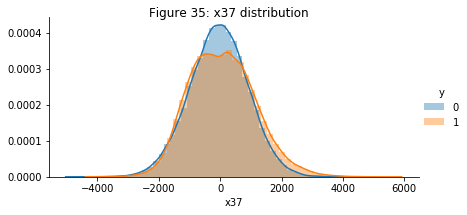

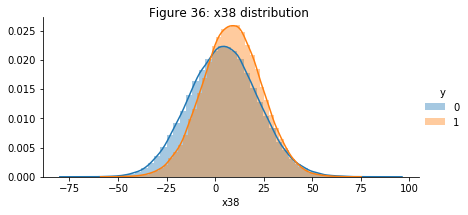

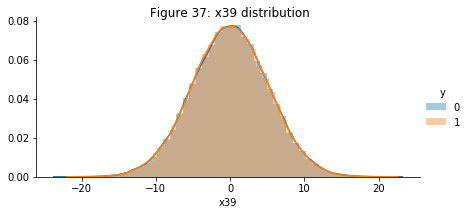

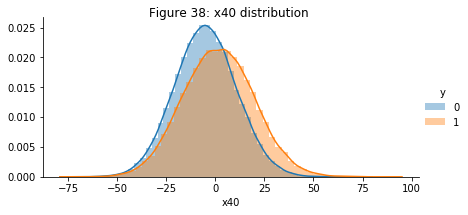

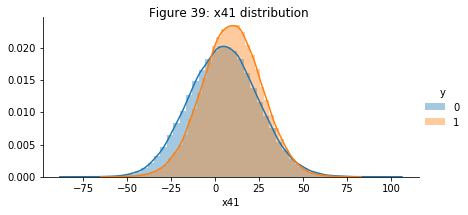

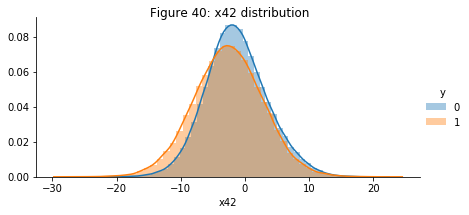

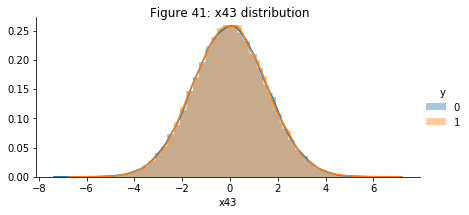

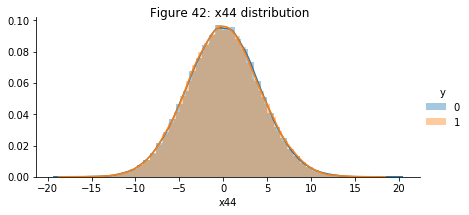

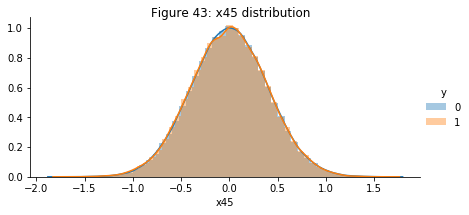

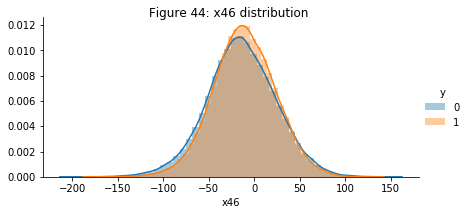

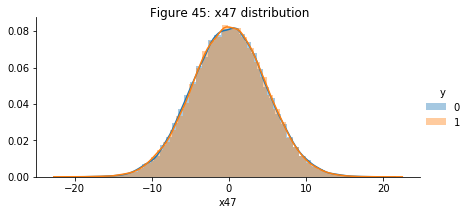

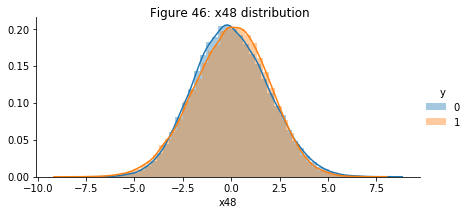

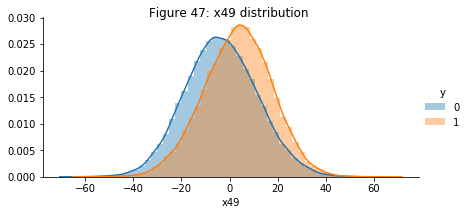

In [10]:
colnames=list(df.drop(['y'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = seaborn.FacetGrid(df, hue='y',aspect=2)
    facet.map(seaborn.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list(["Figure ",colnames.index(i)+1,": ",i," distribution"]))))
    plt.show()

For  the three categorical variables, x24, x29, and x30, we can examine the separation of the variables in relation to the target variable y by plotting the data by labels. See Figures 48, 49, and 50 below.

The figures seem to show that x24 contains locations, x29 contains months, and x30 contains days of the week. However, we cannot make assumptions without more information, particularly because several of the variable values are misspelled ('thurday') or inconsistent ('May' vs. 'sept.')

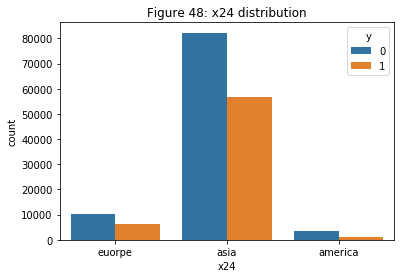

In [11]:
plt.axes()
seaborn.countplot(x=df.x24, data=df, hue="y")
plt.title("Figure 48: x24 distribution")
plt.show()

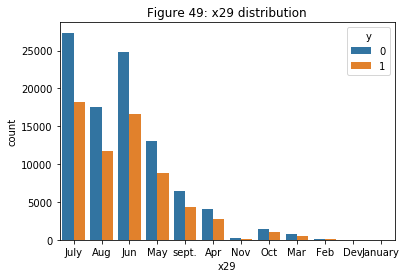

In [12]:
plt.axes()
seaborn.countplot(x=df.x29, data=df, hue="y")
plt.title("Figure 49: x29 distribution")
plt.show()

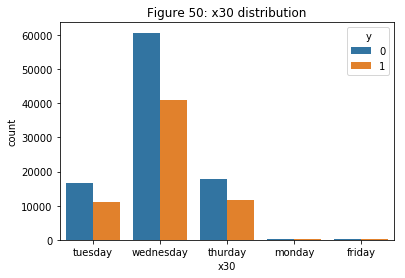

In [13]:
plt.axes()
seaborn.countplot(x=df.x30, data=df, hue="y")
plt.title("Figure 50: x30 distribution")
plt.show()

Further analysis can be made simpler by eliminating missing values. 

In this instance, the decision was made to replace the missing values in each numerical variable by the overall mean of that variable. 

In [14]:
# take column names except y, and replace missing values 
# in each column with the mean of that column

colnames=list(df.drop(['y'], axis=1).select_dtypes(exclude = "O").columns.values)
for i in colnames[0:]:
    if pd.notnull(i):
        mean = df[i].mean()
        df[i] = df[i].fillna(mean)

After imputing the numerical values, we still have 88 rows in which there is a missing value in the categorical columns. As this is only 0.06% of the data, we decided to exclude these rows from the dataset to be analyzed, rather than replacing them with a value at random.

After this, the categorical values are replaced with a numerical representative.

In [15]:
df = df[df['x24'].notnull()]
df = df[df['x29'].notnull()]
df = df[df['x30'].notnull()]

In [16]:
# replace location variables with numbers 1 through 3
df['x24'].loc[df['x24'] == 'asia'] = 1
df['x24'].loc[df['x24'] == 'euorpe'] = 2
df['x24'].loc[df['x24'] == 'america'] = 3

# replace month variables with numbers 1 through 12
df['x29'].loc[df['x29'] == 'January'] = 1
df['x29'].loc[df['x29'] == 'Feb'] = 2
df['x29'].loc[df['x29'] == 'Mar'] = 3
df['x29'].loc[df['x29'] == 'Apr'] = 4
df['x29'].loc[df['x29'] == 'May'] = 5
df['x29'].loc[df['x29'] == 'Jun'] = 6
df['x29'].loc[df['x29'] == 'July'] = 7
df['x29'].loc[df['x29'] == 'Aug'] = 8
df['x29'].loc[df['x29'] == 'sept.'] = 9
df['x29'].loc[df['x29'] == 'Oct'] = 10
df['x29'].loc[df['x29'] == 'Nov'] = 11
df['x29'].loc[df['x29'] == 'Dev'] = 12

# replace the M-F variables with numbers 1 through 5
df['x30'].loc[df['x30'] == 'monday'] = 1
df['x30'].loc[df['x30'] == 'tuesday'] = 2
df['x30'].loc[df['x30'] == 'wednesday'] = 3
df['x30'].loc[df['x30'] == 'thurday'] = 4
df['x30'].loc[df['x30'] == 'friday'] = 5

/Users/kjprice/anaconda3/envs/python3.6/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Looking once more at the summary of the dataset shows us that we now have 159,912 values in each column, including the target variable y.

In [17]:
print("Table 4: Dataset values after imputation")
df.describe().T

Table 4: Dataset values after imputation


,count,mean,std,min,25%,50%,75%,max
x0,159912.0,-0.001025,0.371108,-1.592635,-0.251519,-0.001963,0.248484,1.600849
x1,159912.0,0.001386,6.340233,-26.278302,-4.260377,0.003634,4.282981,27.988178
x2,159912.0,-1.148940,13.272505,-59.394048,-10.162927,-1.335651,7.871762,63.545653
x3,159912.0,-0.023414,8.063873,-35.476594,-5.450853,-0.027423,5.445209,38.906025
x4,159912.0,-0.000441,6.382102,-28.467536,-4.312118,-0.000266,4.306597,26.247812
x5,159912.0,0.013482,7.669222,-33.822988,-5.147367,0.013582,5.188107,35.550110
x6,159912.0,-1.668918,19.297970,-86.354483,-14.776132,-1.942342,11.447870,92.390605
x7,159912.0,-7.691542,30.539673,-181.506976,-27.318385,-6.959275,12.213760,149.150634
x8,159912.0,-0.030625,8.900901,-37.691045,-6.031347,-0.019629,5.972386,39.049831
x9,159912.0,0.005201,6.354239,-27.980659,-4.259723,0.005462,4.304408,27.377842


Now that the categorical values have been converted and missing values have been replaced with column means, we can use a heat map in Figure 51 to determine correlation. Many of the variables show a slight correlation.

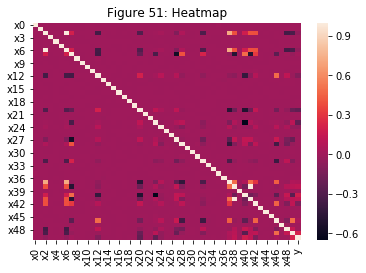

In [18]:
plt.axes()
seaborn.heatmap(df.corr())
plt.title("Figure 51: Heatmap")
plt.show()

## Relatively Balanced Labels

In [33]:
df.y.value_counts()

0    95753
1    64159
Name: y, dtype: int64

## Baseline To Beat

In [85]:
df.y.value_counts()[0] / len(df)

0.5987855820701385

# Create Random Forest Classification

In [19]:
y = df['y']

In [20]:
X = df.drop(['y'], axis=1)

In [38]:
# Naive Bayes does not like negative values - might as well bit the bullet now
scaler = MinMaxScaler(feature_range=(0, 100000))

In [40]:
X = scaler.fit_transform(X)

/Users/kjprice/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [42]:
random_forest = RandomForestClassifier()

In [43]:
random_forest.fit(X_train, y_train)

/Users/kjprice/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Score With TRAIN Data

In [44]:
random_forest.score(X_train, y_train)

0.9957007402543598

### Score With TEST Data

In [45]:
random_forest.score(X_test, y_test)

0.8947878560485257

In [27]:
feature_importances = pd.DataFrame({
    'importance': random_forest.feature_importances_,
    'name': X.columns
})

In [28]:
feature_importances = feature_importances.sort_values('importance', ascending=False).head(n=10)

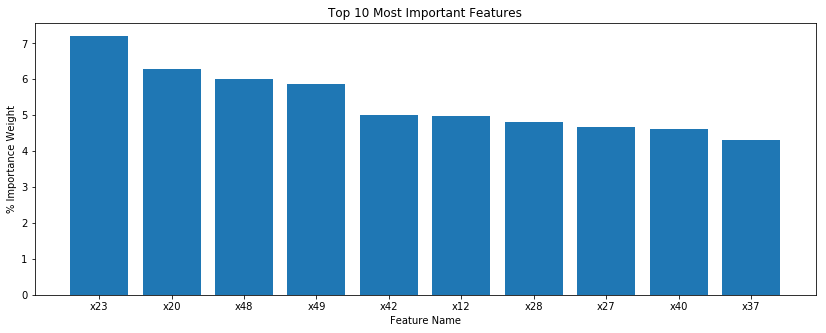

In [29]:
plt.figure(figsize=(14,5))
plt.bar(x=feature_importances.name, height=feature_importances.importance*100)
plt.title('Top 10 Most Important Features')
plt.ylabel('% Importance Weight')
plt.xlabel('Feature Name')
print()

# Create Naive Bayes Classification

In [87]:
bayes = GaussianNB()

In [88]:
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
bayes.score(X_test, y_test)

0.7004346058843761